# DSE 6000 Fall 2019 Final Project
## Madelyn Albers, Erin Breen, and Kayleigh James
## Web Scraping Indeed.com for Data Science Jobs

## Imports, Locations to Search for, and Data Frame Declaration

In [0]:
from bs4 import BeautifulSoup
from google.colab import files
import urllib
import requests
import pandas as pd
import matplotlib.pyplot as plt


state_names = ["Alaska", "Alabama", "Arkansas", "Arizona", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]
df = pd.DataFrame(columns = ['state', 'title', 'company', 'salary', 'description', 'url']) 

## Web Scraping Indeed.com using Beautiful Soup
In the code cell below we will be scraping Ineed for all of the states in the state_name array above.  For each of these states we will be grabbing the first 3 pages of results when "Data Scientist" is entered into the search bar.  If a state does not have 3 pages of results then the try/except blocks will prevent the code from producing an error.  

For each job posting we will be saving the state the position is in, the title, the company name, the salary (if one was provided), the job description, and the job url.  All of this information for a given job posting will be stored in a temporary Pandas data frame and then that temporary data frame will be appended to the final data frame. 

In [2]:
for state in state_names:
  url = "https://www.indeed.com/jobs?q=data+scientist&l=" + state
  for page_number in range (0,2):
    url = url + "&start=" + str(10*page_number)
    req = requests.get(url)
    soup = BeautifulSoup(req.content, "html.parser")
    
    for job in soup.find_all("a", class_ = "jobtitle turnstileLink "): 
      job_url  = "https://www.indeed.com" + job['href'] 
      temp_df = pd.DataFrame(columns = ['state', 'title', 'company', 'salary', 'description', 'url']) 
      try:
        job_soup = BeautifulSoup(urllib.request.urlopen(job_url)) 
      except:
        pass
      try:
        job_soup = BeautifulSoup(urllib.request.urlopen(job_url)) 
      except:
        pass
      temp_df = temp_df.append({'url' : url} , ignore_index=True)
      temp_df['state'] = state
      try:
        temp_df['title'] = job_soup.find("h3", attrs={"class":"jobsearch-JobInfoHeader-title"}).text
      except: 
        pass
      try:
        temp_df['company'] = job_soup.find("div", attrs={"class":"icl-u-lg-mr--sm icl-u-xs-mr--xs"}).text
      except:
        pass
      try:
        temp_df['salary'] = job_soup.find("span", attrs={"class":"icl-u-xs-mr--xs"}).text
      except:
        pass
      try:
        temp_df['description'] = job_soup.find("div", attrs={"class":"jobsearch-jobDescriptionText"}).text
      except:
        pass
      df = df.append(temp_df, ignore_index=True)
      temp_df.drop(axis=0, index=0)
df.head(64)

,state,title,company,salary,description,url
0,Alaska,Data Scientist / BI Developer (REMOTE) - Pytho...,XLFN Consulting,"$100,000 - $110,000 a year",XLFN Consulting provides large organizations w...,https://www.indeed.com/jobs?q=data+scientist&l...
1,Alaska,Data Scientist- Relocation to Saudi Arabia,Saudi Aramco,NaN,Saudi Aramco is seeking an Engineer for the de...,https://www.indeed.com/jobs?q=data+scientist&l...
2,Alaska,Principal Statistical Programmer,Parexel,NaN,As a member of Parexel’s Statistical Programmi...,https://www.indeed.com/jobs?q=data+scientist&l...
3,Alaska,Senior Statistical Programmer,Parexel,NaN,As a member of Parexel’s Statistical Programmi...,https://www.indeed.com/jobs?q=data+scientist&l...
4,Alaska,Mathematical Statistician,US Department of Energy,"$62,236 - $166,500 a year",Duties\nSummary\nThe Department of Energy is s...,https://www.indeed.com/jobs?q=data+scientist&l...
...,...,...,...,...,...,...
59,Arkansas,Data Scientist / BI Developer (REMOTE) - Pytho...,XLFN Consulting,"$100,000 - $110,000 a year",XLFN Consulting provides large organizations w...,https://www.indeed.com/jobs?q=data+scientist&l...
60,Arkansas,Senior/Lead Statistician – Top 5 Global Pharma...,NaN,"$160,000 a year",Senior/Lead Statistician – Top 5 Global Pharma...,https://www.indeed.com/jobs?q=data+scientist&l...
61,Arkansas,Data Scientist,Sam's Club Technology (a division of Walmart),NaN,"Sam's Club Technology, a division of Walmart, ...",https://www.indeed.com/jobs?q=data+scientist&l...
62,Arkansas,Data Scientist,INSIGMA INC,$40 - $50 an hour,"Job SummaryHi,This is Harsh Tyagi from Insigma...",https://www.indeed.com/jobs?q=data+scientist&l...


In [17]:
#df = pd.read_csv("df.csv")
df.shape

(1474, 7)

As we can see, we have stored all of the scrapped data into a Pandas data frame.  This scrape found 1,511 job postings.  Now we will move onto cleaning and formatting the data.

## Data Cleaning and Formatting
In this section we will clean and format the data so we can perform some EDA on our Pandas data frame.  We will begin by converting strings to lower case in the description.  We will also remove any rows with NULL values for description, title, or company.

In [0]:
df.description = df['description'].str.lower()
df = df.dropna(subset=['description'])
df = df.dropna(subset=['company'])
df = df.dropna(subset=['title'])

Next we want to search the description column for skills/technologies related to data science.  For each skill/technology we search for, we will append a new column to the data frame for that word and if the description contains the word, we will put a 'yes' for that row and if that word is missing from the description we will put a 'no' for that row.



In [24]:

df.loc[df['description'].str.contains('python'), 'python'] = 'yes'
df.loc[df['description'].str.contains('qlikview','qlik'), 'qlik'] = 'yes'
df.loc[df['description'].str.contains('tableau'), 'tableau'] = 'yes'
df.loc[df['description'].str.contains('hadoop'), 'hadoop'] = 'yes'
df.loc[df['description'].str.contains('java'), 'java'] = 'yes'
df.loc[df['description'].str.contains('spark'), 'spark'] = 'yes'
df.loc[df['description'].str.contains('solr'), 'solr'] = 'yes'
df.loc[df['description'].str.contains('apache'), 'apache'] = 'yes'
df.loc[df['description'].str.contains('sql'), 'sql'] = 'yes'
df.loc[df['description'].str.contains('mysql'), 'mysql'] = 'yes'
df.loc[df['description'].str.contains('pig'), 'pig'] = 'yes'
df.loc[df['description'].str.contains('hive'), 'hive'] = 'yes'
df.loc[df['description'].str.contains('machine learning','machine-learning'), 'machine_learning'] = 'yes'
df.loc[df['description'].str.contains("master's"), 'grad_degree'] = 'yes'
df.loc[df['description'].str.contains('statistics'), 'statistics'] = 'yes'
df.loc[df['description'].str.contains('deep learning','deep-learning'), 'deep_learning'] = 'yes'
df.loc[df['description'].str.contains('anaconda'), 'anaconda'] = 'yes'
df.loc[df['description'].str.contains('jupyter'), 'jupyter'] = 'yes'
df.loc[df['description'].str.contains('sas'), 'sas'] = 'yes'
df.loc[df['description'].str.contains('tensorflow'), 'tensorflow'] = 'yes'
df.loc[df['description'].str.contains('nlp'), 'nlp'] = 'yes'
df.loc[df['description'].str.contains('scala'), 'scala'] = 'yes'
df.loc[df['description'].str.contains('aws'), 'aws'] = 'yes'
df.loc[df['description'].str.contains('matlab'), 'matlab'] = 'yes'
df.loc[df['description'].str.contains('excel'), 'excel'] = 'yes'
df.loc[df['description'].str.contains('scikit-learn','sklearn'), 'sklearn'] = 'yes'
df.loc[df['description'].str.contains('alteryx'), 'alteryx'] = 'yes'
df.loc[df['description'].str.contains('mongodb'), 'mongodb'] = 'yes'
df.loc[df['description'].str.contains('pandas','numpy'), 'pandas_numpy'] = 'yes'
df.loc[df['description'].str.contains('git'), 'git'] = 'yes'
df.loc[df['description'].str.contains('d3'), 'd3'] = 'yes'
df.loc[df['description'].str.contains('keras'), 'keras'] = 'yes'
df.loc[df['description'].str.contains('pytorch'), 'pytorch'] = 'yes'
df.loc[df['description'].str.contains('hbase'), 'hbase'] = 'yes'
df.loc[df['description'].str.contains('docker'), 'docker'] = 'yes'
df.python = df.python.fillna('no')
df.qlik = df.qlik.fillna('no')
df.tableau = df.tableau.fillna('no')
df.hadoop = df.hadoop.fillna('no')
df.java = df.java.fillna('no')
df.spark = df.spark.fillna('no')
df.solr = df.solr.fillna('no')
df.apache = df.apache.fillna('no')
df.sql = df.sql.fillna('no')
df.mysql = df.mysql.fillna('no')
df.pig = df.pig.fillna('no')
df.hive = df.hive.fillna('no')
df.machine_learning = df.machine_learning.fillna('no')
df.grad_degree = df.grad_degree.fillna('no')
df.statistics = df.statistics.fillna('no')
df.deep_learning = df.deep_learning.fillna('no')
df.anaconda = df.anaconda.fillna('no')
df.jupyter = df.jupyter.fillna('no')
df.sas = df.sas.fillna('no')
df.aws = df.aws.fillna('no')
df.matlab = df.matlab.fillna('no')
df.tensorflow = df.tensorflow.fillna('no')
df.nlp = df.nlp.fillna('no')
df.scala = df.scala.fillna('no')
df.excel = df.excel.fillna('no')
df.sklearn = df.sklearn.fillna('no')
df.alteryx = df.alteryx.fillna('no')
df.mongodb = df.mongodb.fillna('no')
df.pandas_numpy = df.pandas_numpy.fillna('no')
df.git = df.git.fillna('no')
df.d3 = df.d3.fillna('no')
df.keras = df.keras.fillna('no')
df.pytorch = df.pytorch.fillna('no')
df.hbase = df.hbase.fillna('no')
df.docker = df.docker.fillna('no')
df.head(4)

,Unnamed: 0,state,title,company,salary,description,url,python,qlik,tableau,hadoop,java,spark,solr,apache,sql,mysql,pig,hive,machine_learning,grad_degree,statistics,deep_learning,anaconda,jupyter,sas,tensorflow,nlp,scala,aws,matlab,excel,sklearn,alteryx,mongodb,pandas_numpy,git,d3,keras,pytorch,hbase,docker
0,0,Alaska,Data Scientist / BI Developer (REMOTE) - Pytho...,XLFN Consulting,"$100,000 - $110,000 a year",xlfn consulting provides large organizations w...,https://www.indeed.com/jobs?q=data+scientist&l...,yes,no,no,no,no,no,no,no,yes,yes,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no
1,1,Alaska,Data Scientist- Relocation to Saudi Arabia,Saudi Aramco,NaN,saudi aramco is seeking an engineer for the de...,https://www.indeed.com/jobs?q=data+scientist&l...,yes,no,no,no,no,no,no,no,no,no,no,no,yes,no,yes,yes,no,no,no,no,no,no,no,yes,no,no,no,no,no,yes,no,no,no,no,no
2,2,Alaska,Principal Statistical Programmer,Parexel,NaN,as a member of parexel’s statistical programmi...,https://www.indeed.com/jobs?q=data+scientist&l...,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no
3,3,Alaska,Senior Statistical Programmer,Parexel,NaN,as a member of parexel’s statistical programmi...,https://www.indeed.com/jobs?q=data+scientist&l...,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no


We saw that most of the job postings did not provide a salary so we decided to take the subset of the larger data frame that did have non-null values for salaries and put that in a new data frame.  In the original/main data frame we will drop the salary column.

In [25]:
df_salary = df.dropna(subset=['salary'])
df_salary.head(2)

,Unnamed: 0,state,title,company,salary,description,url,python,qlik,tableau,hadoop,java,spark,solr,apache,sql,mysql,pig,hive,machine_learning,grad_degree,statistics,deep_learning,anaconda,jupyter,sas,tensorflow,nlp,scala,aws,matlab,excel,sklearn,alteryx,mongodb,pandas_numpy,git,d3,keras,pytorch,hbase,docker
0,0,Alaska,Data Scientist / BI Developer (REMOTE) - Pytho...,XLFN Consulting,"$100,000 - $110,000 a year",xlfn consulting provides large organizations w...,https://www.indeed.com/jobs?q=data+scientist&l...,yes,no,no,no,no,no,no,no,yes,yes,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no
4,4,Alaska,Mathematical Statistician,US Department of Energy,"$62,236 - $166,500 a year",duties\nsummary\nthe department of energy is s...,https://www.indeed.com/jobs?q=data+scientist&l...,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no


Now that we have a new data frame with the non-null salary postings we need to parse out the salary.  To do this we removed commas, dollar signs, any listing that provided an hourly wage instead of a yearly salary, and dashes.  For listings that provided a range (e.g. "\$100,000 - $120,000 a year") we took the lower end of the range and threw out the upper end.  Once we did these steps we were left with a single number for each row.  We then converted the column type from a string to an integer.  

In [26]:
df_salary['salary'] = df_salary['salary'].str.replace(',', '')
df_salary['salary'] = df_salary['salary'].str.replace('$', '')
df_salary = df_salary.dropna()
df_salary = df_salary[~df_salary.salary.str.contains("hour")]
df_salary['salary'] = df_salary['salary'].str.replace('-', ' ')
df_salary['salary'] = df_salary['salary'].apply(lambda x: x.split(' ')[0])
df_salary['salary'] = df_salary['salary'].str.extract('(\d+)')
df_salary = df_salary.dropna()
df_salary['salary'] = df_salary['salary'].astype(int)
df_salary.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,state,title,company,salary,description,url,python,qlik,tableau,hadoop,java,spark,solr,apache,sql,mysql,pig,hive,machine_learning,grad_degree,statistics,deep_learning,anaconda,jupyter,sas,tensorflow,nlp,scala,aws,matlab,excel,sklearn,alteryx,mongodb,pandas_numpy,git,d3,keras,pytorch,hbase,docker
0,0,Alaska,Data Scientist / BI Developer (REMOTE) - Pytho...,XLFN Consulting,100000,xlfn consulting provides large organizations w...,https://www.indeed.com/jobs?q=data+scientist&l...,yes,no,no,no,no,no,no,no,yes,yes,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no
4,4,Alaska,Mathematical Statistician,US Department of Energy,62236,duties\nsummary\nthe department of energy is s...,https://www.indeed.com/jobs?q=data+scientist&l...,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no
6,6,Alaska,Senior/Lead Statistician – Top 5 Global Pharma...,i-Pharm Consulting,160000,senior/lead statistician – top 5 global pharma...,https://www.indeed.com/jobs?q=data+scientist&l...,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
7,7,Alaska,Data Scientist / BI Developer (REMOTE) - Pytho...,XLFN Consulting,100000,xlfn consulting provides large organizations w...,https://www.indeed.com/jobs?q=data+scientist&l...,yes,no,no,no,no,no,no,no,yes,yes,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no
10,10,Alaska,Mathematical Statistician,US Department of Energy,62236,duties\nsummary\nthe department of energy is s...,https://www.indeed.com/jobs?q=data+scientist&l...,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no
11,11,Alaska,Statistician,US Department of Energy,62236,duties\nsummary\nthe department of energy is s...,https://www.indeed.com/jobs?q=data+scientist&l...,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no
12,12,Alaska,Senior/Lead Statistician – Top 5 Global Pharma...,i-Pharm Consulting,160000,senior/lead statistician – top 5 global pharma...,https://www.indeed.com/jobs?q=data+scientist&l...,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
14,14,Alabama,Sr. Data Analyst,ITAC Solutions,95000,itac is helping a local organization in their ...,https://www.indeed.com/jobs?q=data+scientist&l...,no,no,yes,no,no,no,no,no,yes,no,no,no,no,no,yes,no,no,no,no,no,no,yes,no,no,yes,no,no,no,no,no,no,no,no,no,no
28,28,Alabama,Data Scientist / BI Developer (REMOTE) - Pytho...,XLFN Consulting,100000,xlfn consulting provides large organizations w...,https://www.indeed.com/jobs?q=data+scientist&l...,yes,no,no,no,no,no,no,no,yes,yes,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no
30,30,Alabama,Sr. Data Analyst,ITAC Solutions,95000,itac is helping a local organization in their ...,https://www.indeed.com/jobs?q=data+scientist&l...,no,no,yes,no,no,no,no,no,yes,no,no,no,no,no,yes,no,no,no,no,no,no,yes,no,no,yes,no,no,no,no,no,no,no,no,no,no


We have now converted the salary column to int type so we can work with it later in this project.

##What are the Typical Job Titles Listed in Data Science and What are their Distributions?

Let's plot the top 5 most common job titles from out dataset:

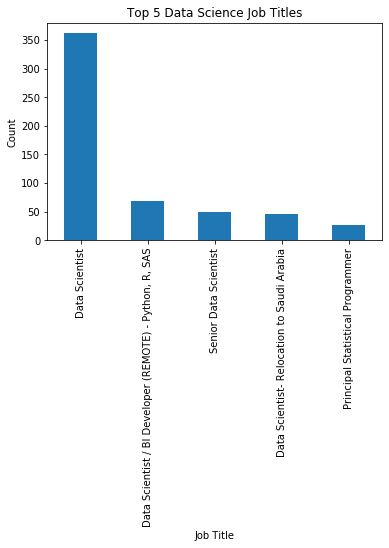

In [27]:
plt.title("Top 5 Data Science Job Titles")
plt.xlabel("Job Title")
plt.ylabel("Count")
most_common_titles = df['title'].value_counts()[0:5]
most_common_titles.plot(kind='bar')
plt.show()

The 2nd and 4th most common job titles don't make too much sense - the company most likely posted the same listing (with the same job title) under several different states which is why it came up several times in our dataset.  This makes sense given both job titles mention remote work or relocation.

## What is the Geographical Distribution of Jobs in this Segment?

Let's plot the states with the most jobs listed on Indeed and the states with the fewest jobs listed on Indeed:

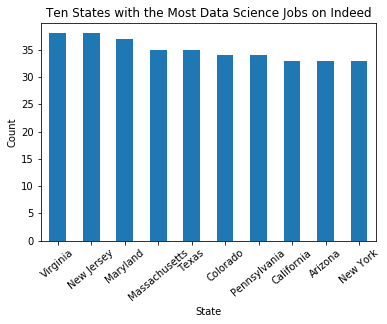

In [28]:
plt.title("Ten States with the Most Data Science Jobs on Indeed")
plt.xlabel("State")
plt.ylabel("Count")
top_states = df.state.value_counts()[0:10]
top_states.plot(kind='bar')
plt.xticks(rotation=40)
plt.show()

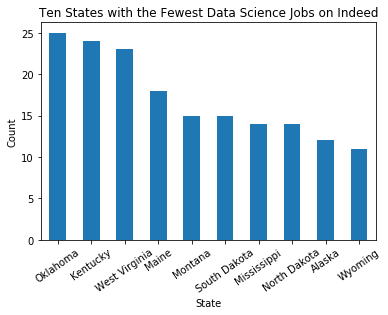

In [29]:
plt.title("Ten States with the Fewest Data Science Jobs on Indeed")
plt.xlabel("State")
plt.ylabel("Count")
bottom_states = df.state.value_counts()[40:50]
bottom_states.plot(kind='bar')
plt.xticks(rotation=35)
plt.show()

The results of these two graphs is relatively unsurprising.  More populated states with lots of white collar workers (i.e. more corporations which want to leverage data analytics) have more jobs posted on Indeed than less populated and more rural states.

## What are the Most Commonly Sought After Skills for Data Science Jobs?

First, let's take a look at how commonly sought after some of the biggest skills we learned in this class were: 

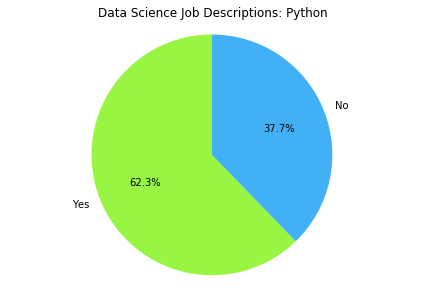

In [30]:
# Count the total amount jobs that require certain tools
df['python'].value_counts()
labels = ['Yes', 'No']
sizes = [945, 573]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors= ['#98f542','#42b0f5'],
        shadow=False, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.title("Data Science Job Descriptions: Python")
plt.show()

Nearly a two thirds of the job listings were looking for candidates who know Python!  Next, let's see how popular of a skill SQL was:

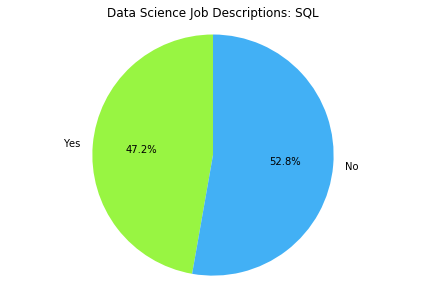

In [31]:
df['sql'].value_counts()
sizes = [717, 801]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors= ['#98f542','#42b0f5'],
        shadow=False, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.title("Data Science Job Descriptions: SQL")
plt.show()

About half of employers were looking for people who know SQL so this is another vital skill in the field.  Finally, let's take a look at Hadoop:

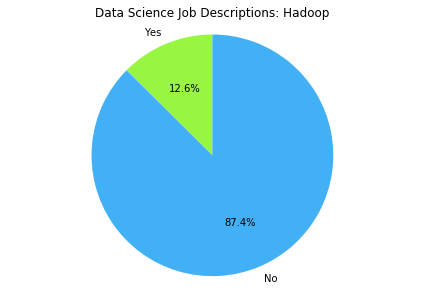

In [32]:
df['hadoop'].value_counts()
labels = ['Yes', 'No']
sizes = [191, 1327]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors= ['#98f542','#42b0f5'],
        shadow=False, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.title("Data Science Job Descriptions: Hadoop")
plt.show()

This was surprising, only 12.6% of employers were looking for people familiar with Hadoop.  This may be because employers listed out components of the Hadoop ecosystem (e.g. Hive, MapReduce, or Pig) instead of just saying 'Hadoop' in the description.  This may also be because Hadoop is more necessary in a Data Engineering position instead of a Data Science position.

Now let's find the top skills employers look for from that big list we made earlier.  First we make a new data frame that only has the skills columns.  Then we apply a value count to all of the columns to see how many yes-es and no-s there were for each skill/technology.  We then transpose it so we can order by the number of yes-es.  

In [0]:
skills_df = df.drop(['state','title','company','description','url'], axis=1)
skills_df = skills_df.loc[:, ~skills_df.columns.str.contains('^Unnamed')]
skills_df = skills_df.apply(pd.value_counts)

In [37]:
skills_df_transposed = skills_df.T
skills_df_transposed = skills_df_transposed.sort_values(by=['yes'], ascending=False)
skills_df_transposed.head()

,"$1,000 a month",$10 an hour,$100 - $150 an hour,"$100,000 - $110,000 a year","$100,000 - $130,000 a year","$100,000 - $140,000 a year","$100,000 - $200,000 a year","$109,000 - $130,000 a year","$110,000 - $130,000 a year","$117,191 - $152,352 a year","$117,400 - $173,200 a year","$119,700 a year","$120,000 - $170,000 a year","$120,000 - $220,000 a year","$120,000 a year","$125,000 - $190,000 a year",$13 - $15 an hour,"$130,000 a year","$135,000 - $140,000 a year","$135,000 - $150,000 a year",$14 an hour,"$145,000 a year",$15 - $17 an hour,"$160,000 - $180,000 a year","$160,000 a year","$200,000 - $225,000 a year",$22.88 an hour,$23.38 - $30.13 an hour,$23.44 - $34.38 an hour,$24.76 an hour,$25 - $150 an hour,"$27,832 - $48,428 a year",$28 - $34 an hour,$29.69 an hour,"$3,434 - $5,151 a month",$30 an hour,$35 - $40 an hour,"$4,019 a month",$40 - $50 an hour,$46 - $48 an hour,...,"$61,400 - $92,100 a year","$61,818 - $87,714 a year","$62,236 - $166,500 a year","$63,031 - $145,000 a year",$65 - $70 an hour,"$65,000 - $75,000 a year","$65,000 a year","$7,000 a month",$70 - $80 an hour,"$70,000 - $100,000 a year","$70,000 - $110,000 a year","$70,000 - $80,000 a year","$70,000 - $90,000 a year","$70,000 a year",$75 - $80 an hour,"$75,000 - $150,000 a year","$75,900 - $111,000 a year","$75,900 - $130,049 a year","$79,000 - $86,000 a year","$80,000 - $110,001 a year","$80,000 - $125,000 a year","$80,000 - $150,000 a year","$80,000 a year","$81,078 - $129,709 a year",$85 - $150 an hour,"$85,000 - $105,000 a year","$85,000 a year","$89,900 a year","$90,000 - $110,000 a year","$90,000 - $120,000 a year","$90,000 - $125,000 a year","$90,000 - $130,000 a year","$90,000 - $150,000 a year","$95,000 a year","$97,302 - $155,667 a year","$99,172 - $128,920 a year","$99,172 - $152,352 a year","Up to $55,000 a year",no,yes
python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,497.0,893.0
statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,577.0,813.0
machine_learning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,636.0,754.0
sql,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,708.0,682.0
excel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,842.0,548.0


We can see that the top 5 skills employers are looking for are Python, statistics, machine learning, SQL, and Excel.  Let's plot the top 10 skills:

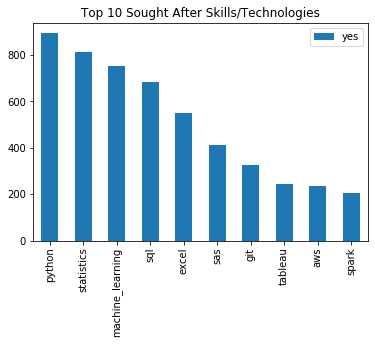

In [35]:
skills_df_transposed.iloc[0:10].plot.bar(y='yes', title='Top 10 Sought After Skills/Technologies')

From this plot we can see in addition to the top 5 we listed above, SAS, Git, Tableau, AWS, and Spark are highly valued skills that are worth investing time in.

## Is there a Correlation between State and Salary?

Now we would like to see if certain states in the US had higher salaries.  For this we will be using the salary dataframe that we cleaned earlier.  We will drop all the columns aside from salary and state.

In [46]:
df_salary_new = df_salary[['state','salary']]
df_salary_new

,state,salary
0,Alaska,100000
4,Alaska,62236
6,Alaska,160000
7,Alaska,100000
10,Alaska,62236
...,...,...
1452,West Virginia,100000
1462,West Virginia,160000
1463,Wyoming,100000
1468,Wyoming,100000


Now we want to find the average salary for each state.  We will do a group by (by state) and then find the mean salary for each.

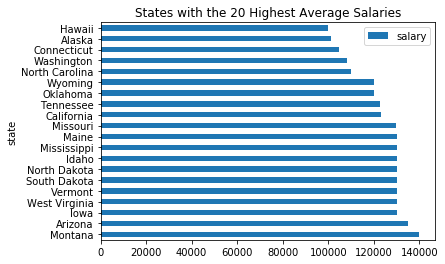

In [55]:
df_salary_means = df_salary_new.groupby(['state']).mean()
df_salary_means = df_salary_means.sort_values(by=['salary'], ascending=False)
df_salary_means.iloc[0:20].plot.barh(y='salary', title='States with the 20 Highest Average Salaries')

Surprisingly Montana is the highest paying state (on average) for data scientists.  This is most likely heavily skewed due to there being very few job postings that provided a salary (200 out of around 1,400 provided a salary and even fewer once the ones providing hourly wages were removed).  It was also surprising to see other rural/sparsely populated states (e.g. North and South Dakota) to be so high on the list.  It appears as though there are few data science jobs in these states, but that the jobs that do exist are very high paying.

## Conclusion and Summary